<a href="https://colab.research.google.com/github/Ruthuja-Gaikwad/2203a52117/blob/main/heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
data=pd.read_csv("/content/heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
import numpy as np
import pandas as pd
data=pd.read_csv("/content/heart.csv")
print(data)
print('-----------------------------------------------------------------------------------------------------------------')
features=data.drop(columns=['HeartDisease'],axis=1)
target=data['HeartDisease']
data['Sex'].replace({'M': 0, 'F': 1}, inplace=True)
data['ChestPainType'].replace({'ATA': 0, 'NAP': 1,'ASY':2,'TA':3}, inplace=True)
data['RestingECG'].replace({'Normal': 0, 'ST': 1,'LVH':2}, inplace=True)
data['ExerciseAngina'].replace({'N': 0, 'Y': 1}, inplace=True)
data['ST_Slope'].replace({'Up': 0, 'Flat': 1,'Down':2}, inplace=True)



     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N  

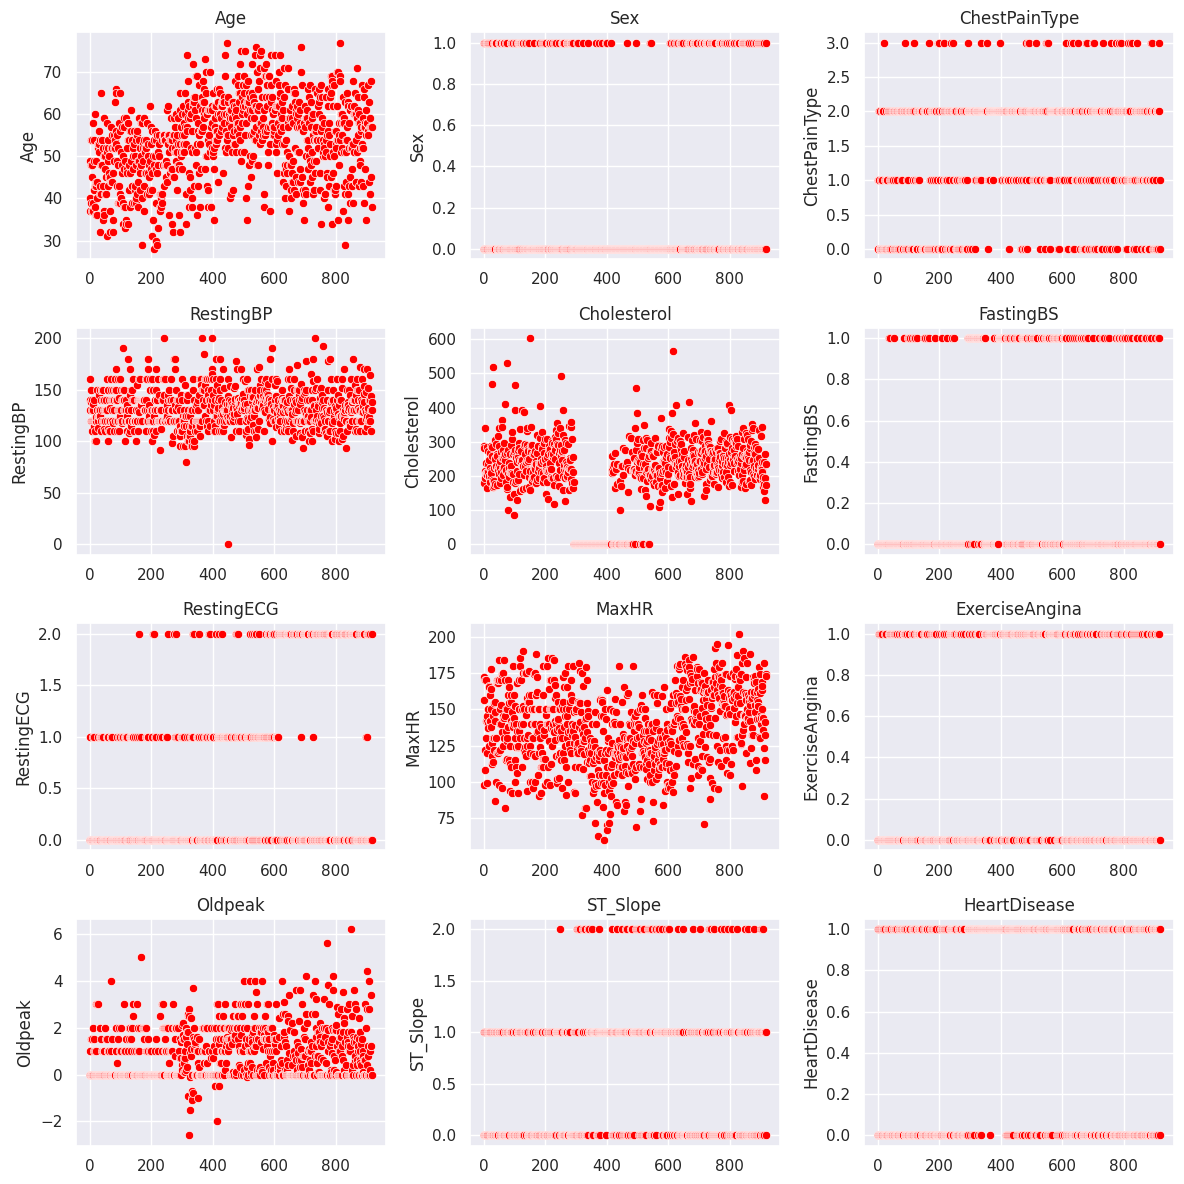

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              0        140          289          0           0   
1     49    1              1        160          180          0           0   
2     37    0              0        130          283          0           1   
3     48    1              2        138          214          0           0   
4     54    0              1        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              3        110          264          0           0   
914   68    0              2        144          193          1           0   
915   57    0              2        130          131          0           0   
916   57    1              0        130          236          0           2   
917   38    0              1        138          175          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0  

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=20)
sns.set()
data.head()
data.describe()
num_cols = len(data.columns)
num_rows = (num_cols + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(12, 3 * num_rows))
axes = axes.flatten()
for i, column in enumerate(data.columns):
    ax = axes[i]
    sns.scatterplot(data[column], ax=ax, color = "red")
    ax.set_title(column)

for i in range(num_cols, num_rows * 3):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
x=data.drop(columns='HeartDisease',axis=1)
y=data['HeartDisease']
print(x)
print(y)
scalar=MinMaxScaler()#normalized
scalar.fit(x)
x_scaled=scalar.transform(x)
print(x_scaled)
features=x_scaled
target=data['HeartDisease']
print(features)
print(target)




In [ ]:
print("X.SHAPE=",x.shape)
print("X_TEST.SHAPE=",x_test.shape)
print("X_TRAIN.SHAPE=",x_train.shape)
print("Y_TEST.SHAPE=",y_test.shape)
print("Y_TRAIN.SHAPE=",y_train.shape)

X.SHAPE= (918, 11)
X_TEST.SHAPE= (92, 11)
X_TRAIN.SHAPE= (826, 11)
Y_TEST.SHAPE= (92,)
Y_TRAIN.SHAPE= (826,)


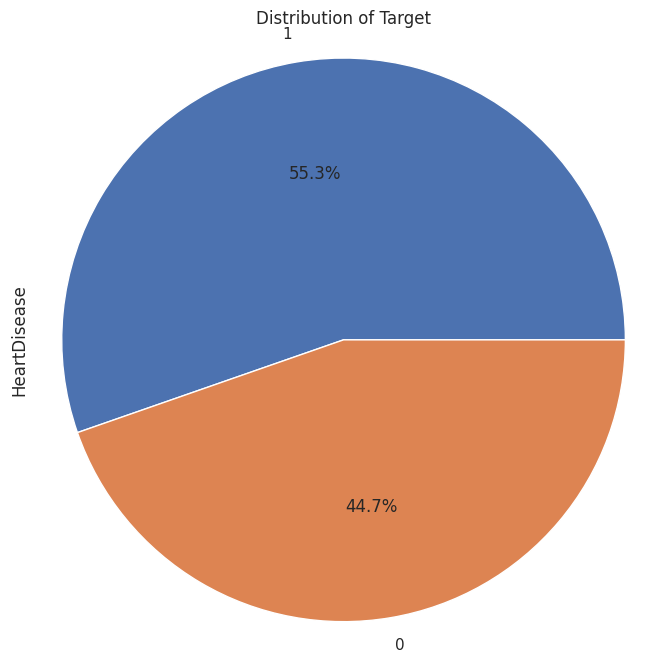

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/heart.csv')

# Assuming you have a column in your dataset that you want to visualize as a pie chart
# For example, let's assume you want to create a pie chart for the 'target' column.
# You should adjust this based on your specific dataset.

# Create a pie chart
plt.figure(figsize=(8, 8))
data['HeartDisease'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Target')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()  # Display the pie chart



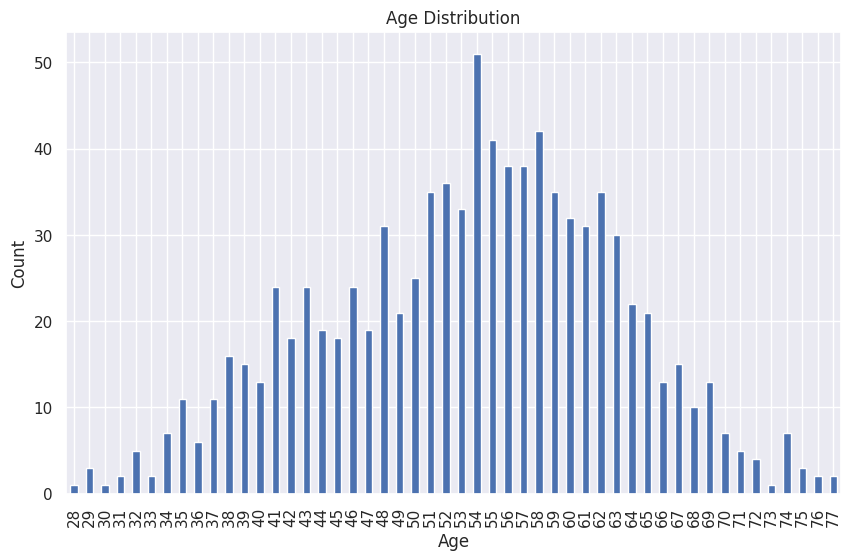

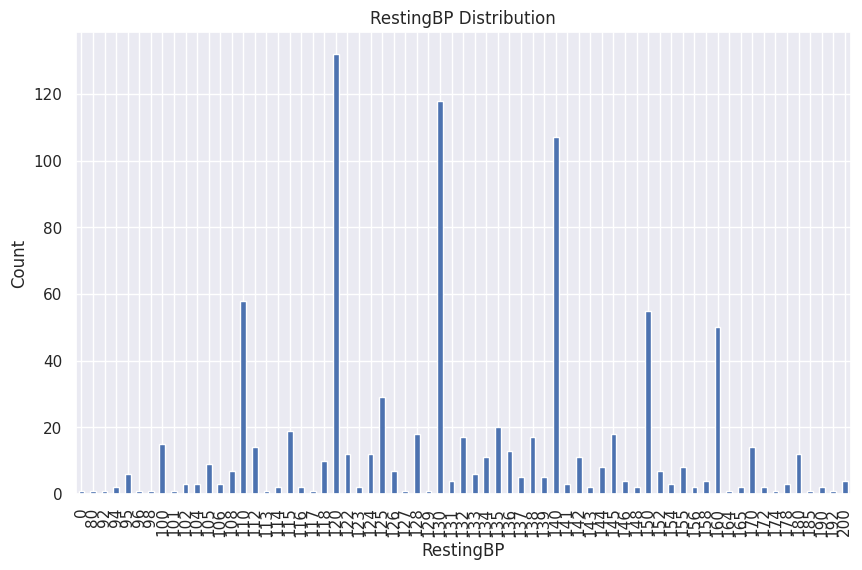

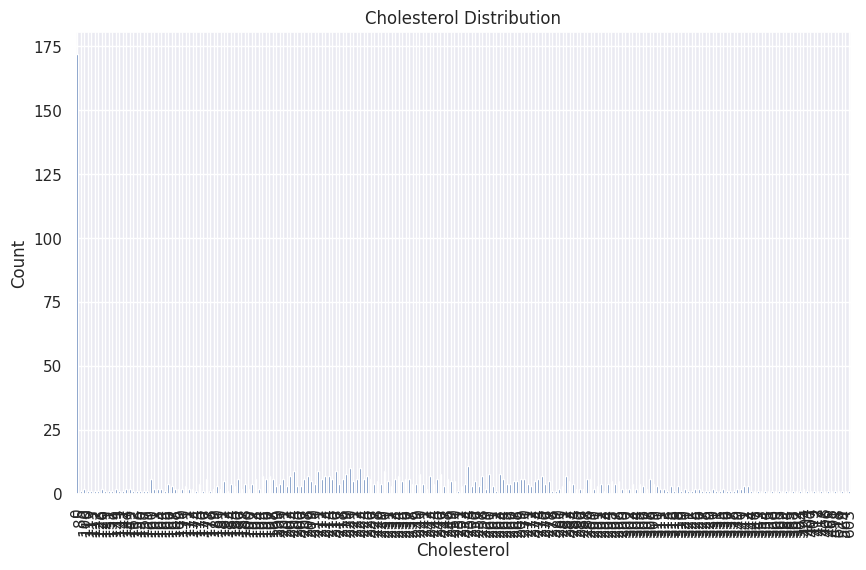

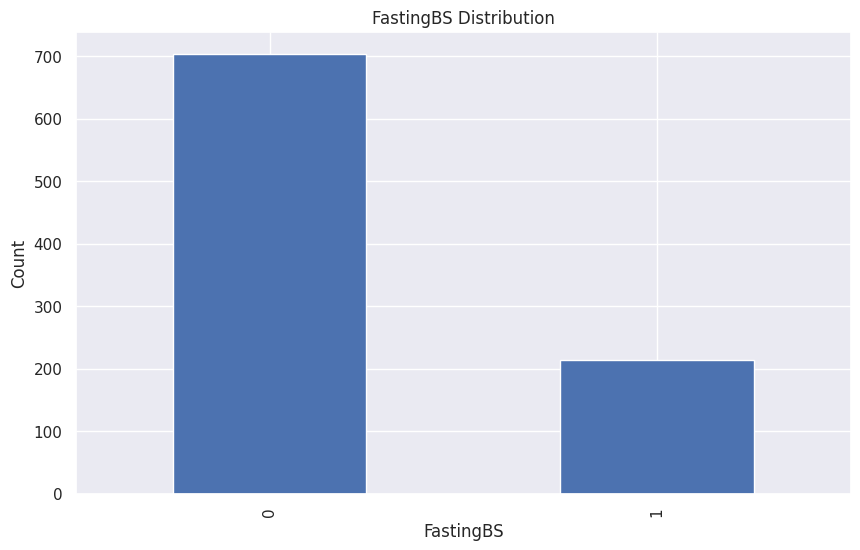

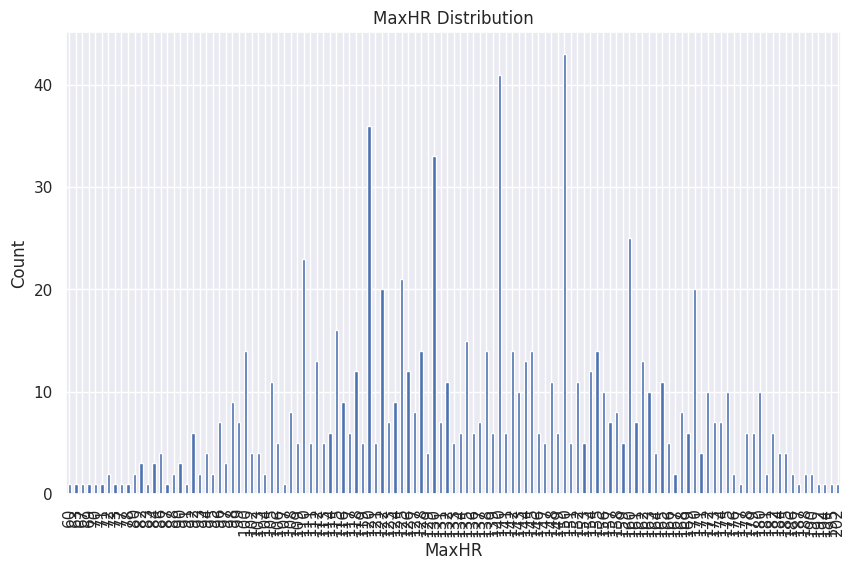

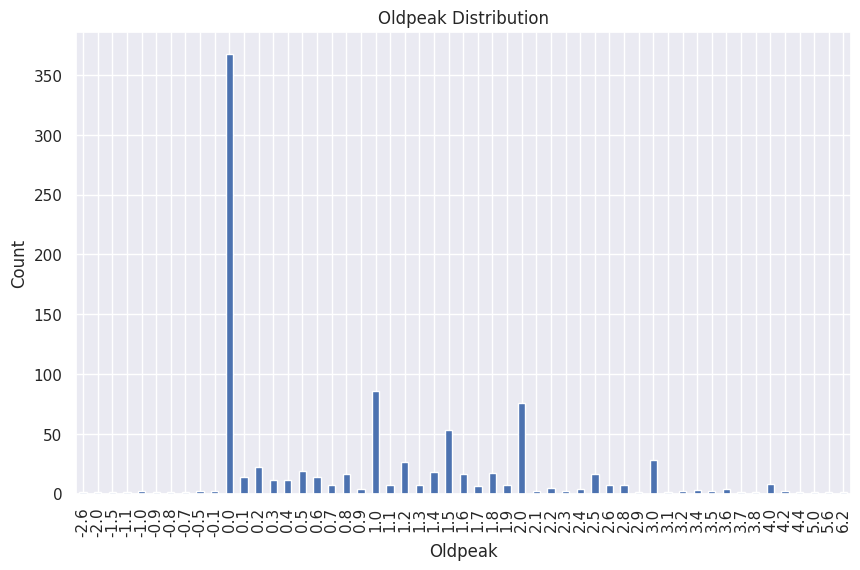

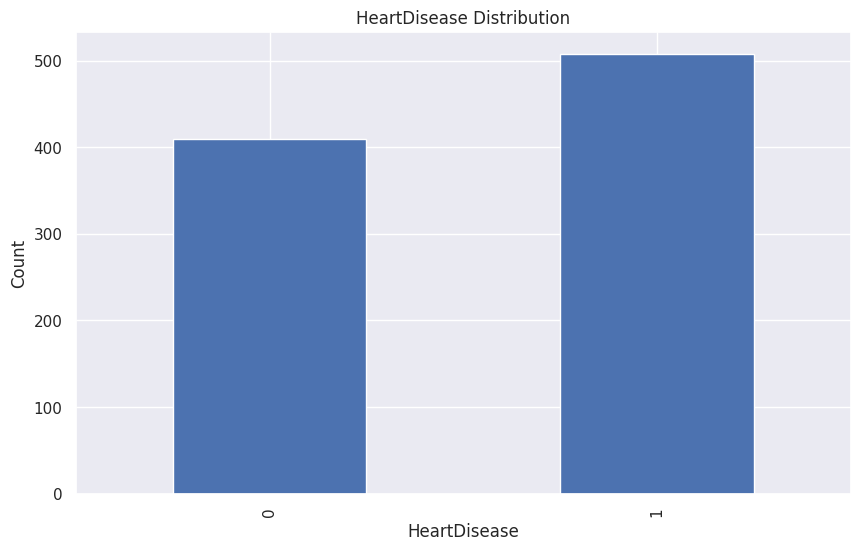

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/heart.csv')

# Loop through the columns and create a bar graph for each
for column in data.columns:
    # Skip non-numeric columns to avoid errors
    if data[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(10, 6))
        data[column].value_counts().sort_index().plot(kind='bar')
        plt.title(f'{column} Distribution')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()


Explained Variance Ratio: [0.2619465  0.13093813]


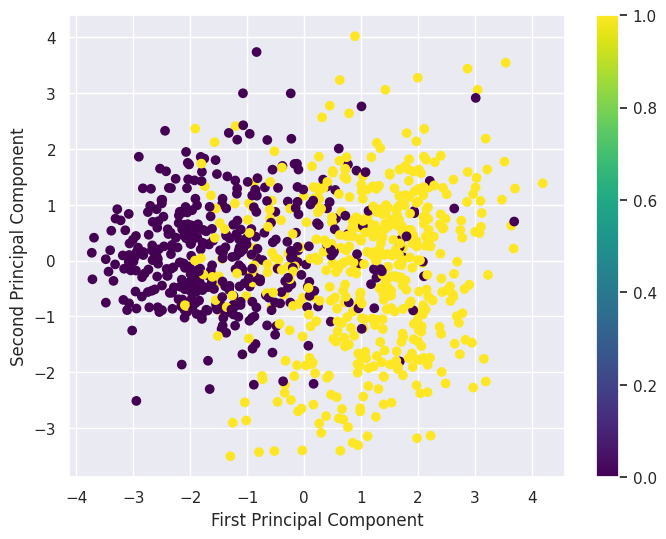

In [ ]:
#pca
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

print(f"Explained Variance Ratio: {explained_variance_ratio}")

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()
plt.show()

(734, 2) (184, 2)
Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.86      0.78      0.81        85
           1       0.82      0.89      0.85        99

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184

Confusion Matrix:
[[66 19]
 [11 88]]


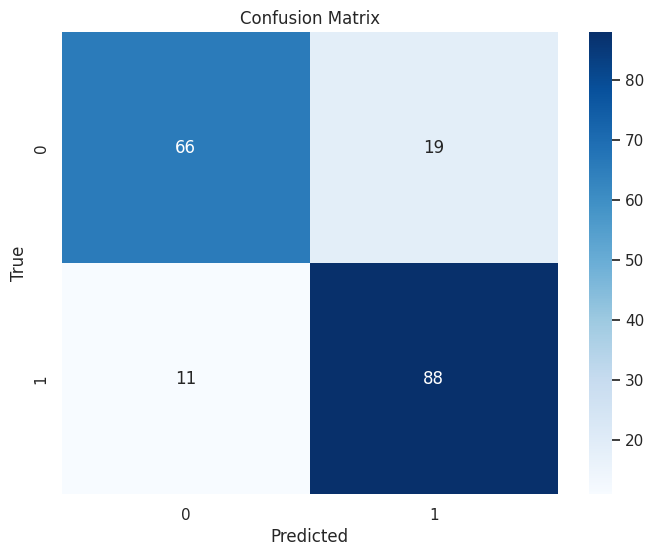

In [ ]:
#svm
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
svm_classifier = SVC(kernel='linear', random_state=2)
x_train, x_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.2, random_state=20)
print(x_train.shape,x_test.shape)
svm_classifier.fit(x_train, y_train)
y_pred = svm_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
# Plot heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

[1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1
 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0]
Accuracy: 0.63
              precision    recall  f1-score   support

           0       0.67      0.52      0.59        46
           1       0.61      0.74      0.67        46

    accuracy                           0.63        92
   macro avg       0.64      0.63      0.63        92
weighted avg       0.64      0.63      0.63        92

Confusion Matrix:
[[24 22]
 [12 34]]


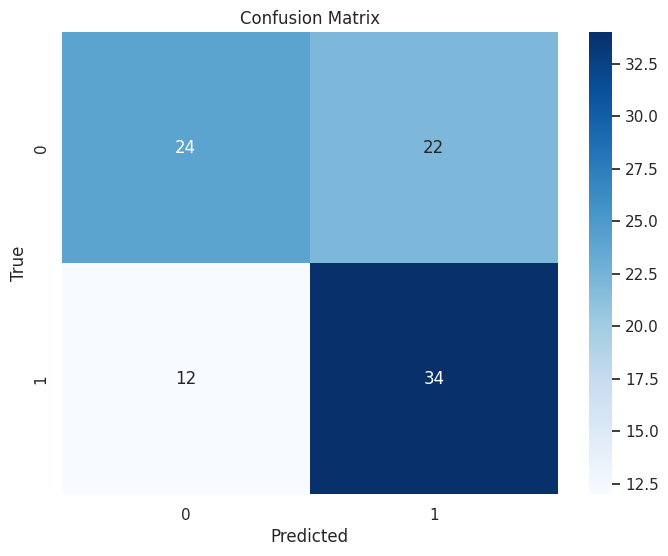

Confusion Matrix:
[[24 22]
 [12 34]]


In [ ]:
#perceptron
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
perceptron_model = Perceptron()
x_train, x_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.1, random_state=20)
perceptron_model.fit(x_train, y_train)
y_pred = perceptron_model.predict(x_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
    # Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
# Plot heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print("Confusion Matrix:")
print(cm)

Accuracy: 0.875
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        75
           1       0.88      0.92      0.90       109

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184

Confusion Matrix:
[[ 61  14]
 [  9 100]]


<ipython-input-10-91442790953a>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = data.fillna(data.mean())


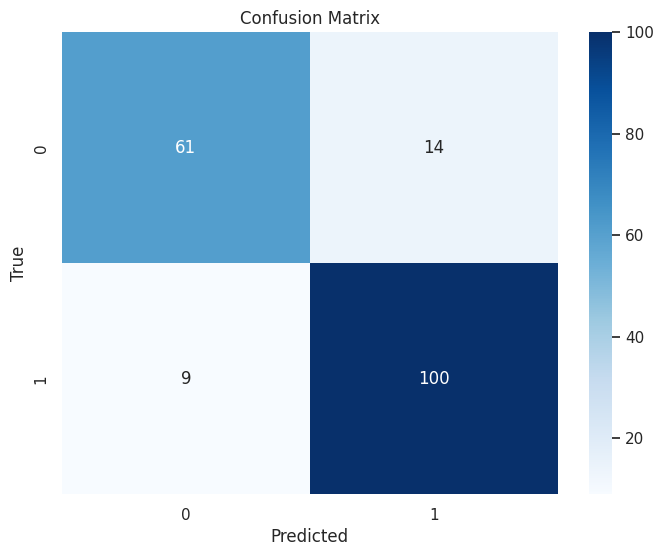

Confusion Matrix:
[[ 61  14]
 [  9 100]]


In [ ]:
#logisti regression
from sklearn.metrics import accuracy_score, confusion_matrix
def logistic_regression(data):
    data = data.fillna(data.mean())
    if data['HeartDisease'].isnull().sum() > 0:
        raise ValueError("NaNs found in the target variable.")
    x_train, x_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.2, random_state=40)
    logistic_reg = LogisticRegression()
    logistic_reg.fit(x_train, y_train)
    y_pred = logistic_reg.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print(classification_report(y_test, y_pred))
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
# Plot heatmap for confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    print("Confusion Matrix:")
    print(cm)
logistic_regression(data)





[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1]
Confusion Matrix:
[[24 22]
 [12 34]]


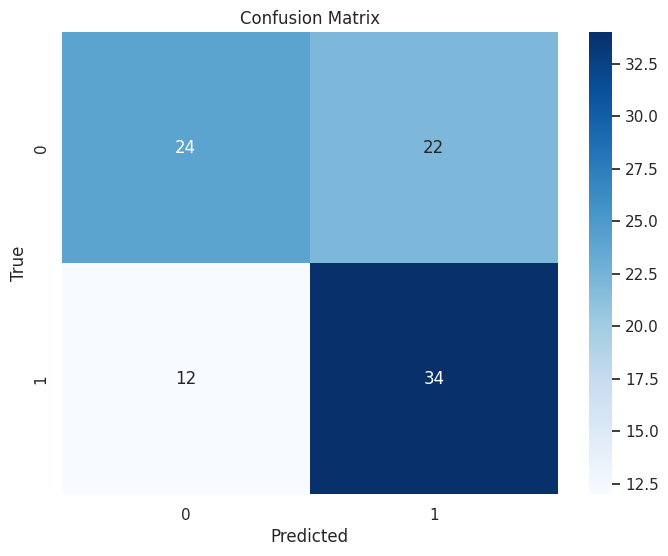

Confusion Matrix:
[[24 22]
 [12 34]]
Accuracy of the Perceptron Model: 0.64


In [ ]:
# Define the perceptron function (mamually)
import random as rd
def perceptron(weights, bias, x_test):
    y_pred = []
    for i in range(len(x_test)):
        z = np.dot(weights, x_test[i]) + bias
        s = 1 / (1 + np.exp(-z))
        if s >= 0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    return y_pred
rd.seed(19)
weights = [rd.uniform(-1, 1) for _ in range(x_train.shape[1])]
bias = rd.uniform(-1, 1)
y_pred_perceptron = perceptron(weights, bias, x_test)
print(y_pred_perceptron)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print("Confusion Matrix:")
print(cm)
print(f'Accuracy of the Perceptron Model: {accuracy_perceptron:.2f}')

[0.782608695652174, 0.8315217391304348, 0.842391304347826, 0.8315217391304348, 0.842391304347826, 0.8369565217391305, 0.842391304347826, 0.8315217391304348, 0.8315217391304348, 0.8369565217391305, 0.842391304347826, 0.8369565217391305, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8478260869565217, 0.8532608695652174, 0.842391304347826, 0.842391304347826]


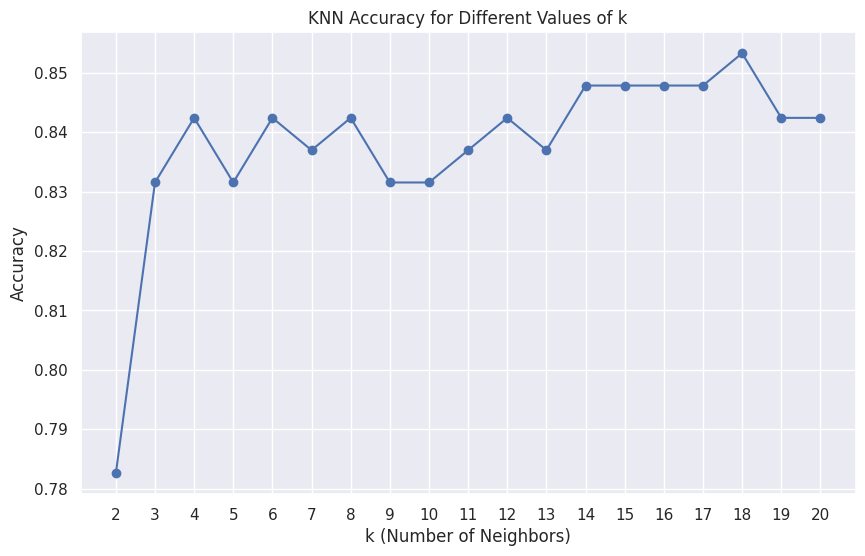

from K=18 we are getting good accuracy


In [ ]:
#knn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.2, random_state=True)
k_values = list(range(2, 21))
accuracy_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
print(accuracy_scores)
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()
print("from K=18 we are getting good accuracy")

In [ ]:


# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load the heart dataset
heart_data = pd.read_csv('/content/heart.csv')

# Perform data preprocessing
# Assuming that 'NAP' represents missing values, we'll replace them with NaN
heart_data = heart_data.replace('NAP', pd.NA)

# Handle missing values by imputing with the mean of each column
heart_data = heart_data.fillna(heart_data.mean())

# Convert categorical variables to one-hot encoding
categorical_columns = ['Sex', 'ChestPainType',  'RestingECG', 'ExerciseAngina', 'ST_Slope']
heart_data = pd.get_dummies(heart_data, columns=categorical_columns, drop_first=True)

# Create interactive widgets for user input
feature_checkboxes = {feature: widgets.Checkbox(value=True, description=feature) for feature in heart_data.columns[:-1]}
C_slider = widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='C:')
kernel_dropdown = widgets.Dropdown(options=['linear', 'rbf', 'poly', 'sigmoid'], description='Kernel:')
gamma_slider = widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Gamma:')
train_button = widgets.Button(description='Train SVM')
output = widgets.Output()

# Function to handle button click and display results
def train_button_clicked(b):
    with output:
        clear_output()
        # Get the selected features
        selected_features = [feature for feature, checkbox in feature_checkboxes.items() if checkbox.value]

        # Split the data into features (X) and target (y) using selected features
        X = heart_data[selected_features]
        y = heart_data['HeartDisease']

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

        # Create and train the SVM model
        C = C_slider.value
        kernel = kernel_dropdown.value
        gamma = gamma_slider.value
        svm_model = SVC(C=C, kernel=kernel, gamma=gamma)
        svm_model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = svm_model.predict(X_test)

        # Calculate the accuracy of the model
        accuracy = accuracy_score(y_test, y_pred)

        print(f'SVM Model Accuracy: {accuracy}')

train_button.on_click(train_button_clicked)

# Display the widgets
feature_checkboxes_widgets = [widget for widget in feature_checkboxes.values()]
display(widgets.VBox(feature_checkboxes_widgets + [C_slider, kernel_dropdown, gamma_slider, train_button, output]))


<ipython-input-15-c8c55e85f950>:17: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  heart_data = heart_data.fillna(heart_data.mean())


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load the heart dataset
heart_data = pd.read_csv('/content/heart.csv')

# Define the categorical and numerical features
categorical_features = ['Sex', 'ChestPainType',  'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR']

# Create input widgets for user to specify feature values
feature_inputs = {}
for feature in categorical_features:
    feature_inputs[feature] = widgets.Dropdown(options=heart_data[feature].unique(), value=heart_data[feature].iloc[0], description=feature)

for feature in numerical_features:
    feature_inputs[feature] = widgets.FloatText(value=heart_data[feature].iloc[0], description=feature)

# Target variable input
target_input = widgets.Dropdown(options=heart_data['HeartDisease'].unique(), value=heart_data['HeartDisease'].iloc[0], description='HeartDisease')

C_slider = widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='C:')
kernel_dropdown = widgets.Dropdown(options=['linear', 'rbf', 'poly', 'sigmoid'], description='Kernel:')
gamma_slider = widgets.FloatSlider(value=1.0, min=0.1, max=10.0, step=0.1, description='Gamma:')
train_button = widgets.Button(description='Train SVM')
output = widgets.Output()

# Function to handle button click and display results
def train_button_clicked(b):
    with output:
        clear_output()
        # Get the specified feature values
        feature_values = {feature: widget.value for feature, widget in feature_inputs.items()}

        # Prepare the user-specified data for prediction
        user_data = pd.DataFrame([feature_values])

        # Preprocess the data
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), numerical_features),
                ('cat', OneHotEncoder(drop='first'), categorical_features)
            ])

        # Create a pipeline with preprocessing and SVM model
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('model', SVC(C=C_slider.value, kernel=kernel_dropdown.value, gamma=gamma_slider.value))
        ])

        # Fit the pipeline on the entire dataset
        X = heart_data.drop(columns=['HeartDisease'])
        y = heart_data['HeartDisease']
        pipeline.fit(X, y)

        # Make predictions for the user data
        prediction = pipeline.predict(user_data)

        print(f'SVM Model trained with specified feature values and predicts target: {prediction[0]}')

train_button.on_click(train_button_clicked)

# Display the widgets
feature_input_widgets = [widget for widget in feature_inputs.values()]
display(widgets.VBox(feature_input_widgets + [target_input, C_slider, kernel_dropdown, gamma_slider, train_button, output]))


In [ ]:
]